# Pricing d'options européennes par la méthode de Monte-Carlo

In [50]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Estimation de Pi

In [2]:
# Nombre de simulations
N = 10000

# Tirage d'un grand nombre de points uniformément sur [0,1]^2
x = np.random.random(size=N)
y = np.random.random(size=N)

# Tableau de booléens indiquant si le point se trouve dans le quart de cercle.
z = (x**2+y**2)<1

# Estimation de pi
pi_est = 4*z.sum()/N

print('Estimation de pi: {}'.format(pi_est))

Estimation de pi: 3.1496


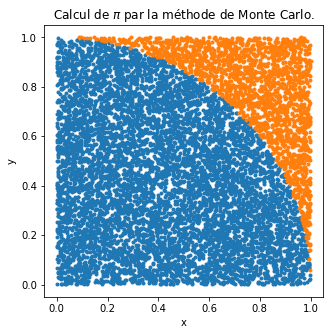

In [3]:
# plt.subplots() permet de créer un objet figure des objets axes.
fig, ax = plt.subplots(1,1,figsize=(5,5))

plt.scatter(x[z], y[z], marker='.')
# Logical not permet d'inverser la valeur logique des éléments d'un np.array.
nz = np.logical_not(z) 
plt.scatter(x[nz], y[nz], marker='.') 
ax.set(title=r"Calcul de $\pi$ par la méthode de Monte Carlo.", 
       xlabel='x',
       ylabel='y')
plt.show()

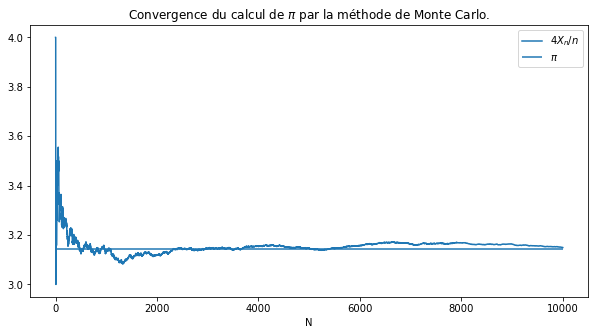

In [4]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
conv = 4*np.cumsum(z)/(np.arange(N)+1)
plt.plot(conv, label=r'$4X_n/n$')
plt.hlines(np.pi, 0, N, label=r'$\pi$')
ax.set(title=r"Convergence du calcul de $\pi$ par la méthode de Monte Carlo.",
      xlabel='N')
plt.legend();

## Valorisation par la formule de Black-Scholes

In [22]:
# Paramètres globaux
S0 = 100  # Prix initial du sous-jacent
K = 100  # Strike de l'option
r = 0.05  # Taux d'intérêt sans risque
sigma = 0.2  # Volatilité du sous-jacent
T = 1.0  # Maturité
num_simulations = 100000 # Nombre de simulations pour MC

In [23]:
def black_scholes_call(S0, K, r, sigma, T):
    """
    Calcul du prix d'un call Européen par la formule de Black-Scholes
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

In [24]:
call_option_price = black_scholes_call(S0, K, r, sigma, T)
print("Prix d'un Call Européen (Black-Scholes):", call_option_price)

Prix d'un Call Européen (Black-Scholes): 10.450583572185565


## Monte-Carlo

In [17]:
def mc_actif(S0, r, sigma, T, Nsteps, Nsim):
    S = np.zeros((Nsim, 1+Nsteps))
    S[:, 0] = S0
    dt = T / Nsteps
    nudt = (r - 0.5 * sigma **2) * dt
    sidt = sigma * np.sqrt(dt)
    
    for i in range(0,Nrep):
        for j in range(0,Nsteps):
            S[i,j+1] = S[i,j] * np.exp(nudt + sidt * np.random.normal())
    return S

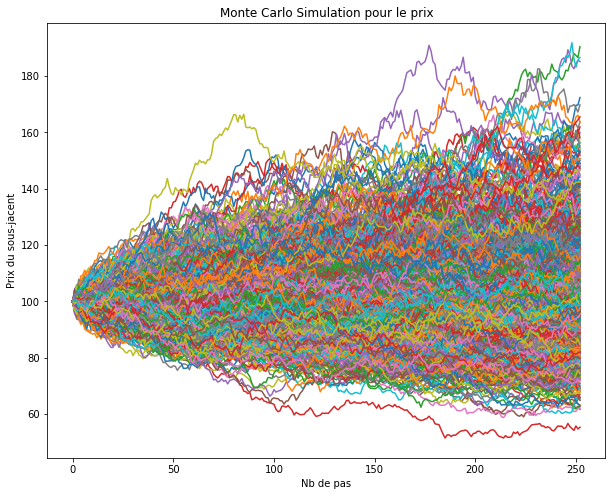

In [19]:
S0 = 100
K = 110
CallOrPut = 'call'
r = 0.03
sigma = 0.2
T = 1
Nsteps = 252
Nrep = 1000
S = mc_asset(S0, r, sigma, T, Nsteps, Nrep)

plt.figure(figsize = (10,8))
for i in range(len(S)):
    plt.plot(S[i])
plt.xlabel('Nb de pas')
plt.ylabel('Prix du sous-jacent')
plt.title('Monte Carlo Simulation pour le prix')
plt.show()

In [25]:
import numpy as np
from scipy.stats import norm

def european_call_monte_carlo(S0, K, r, sigma, T, num_simulations):
    """
    Calcul du prix d'un call Européen par la simuualtion de Monte Carlo
    """
    dt = T / 252
    num_steps = int(T / dt)

    Z = np.random.normal(0, 1, (num_simulations, num_steps))
    S = np.zeros((num_simulations, num_steps + 1))
    S[:, 0] = S0

    for i in range(1, num_steps + 1):
        S[:, i] = S[:, i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, i - 1])

    payoff = np.maximum(S[:, -1] - K, 0)

    option_price = np.mean(payoff) * np.exp(-r * T)
    error = np.std(payoff) / np.sqrt(num_simulations)

    lower_bound = option_price - 1.96 * error
    upper_bound = option_price + 1.96 * error

    return option_price, error, (lower_bound, upper_bound)

In [26]:
call_option_price, error, confidence_intervals = european_call_monte_carlo(S0, K, r, sigma, T, num_simulations)
print("Prix du Call Euro (Monte Carlo):", call_option_price)
print("Erreur:", error)
print("Intervalles de confiance (95%):", confidence_intervals)

Prix du Call Euro (Monte Carlo): 10.439928698380001
Erreur: 0.048955660873991814
Intervalles de confiance (95%): (10.343975603066976, 10.535881793693026)


In [27]:
num_simulations = [10,100,500,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000]
calls = [european_call_monte_carlo(S0, K, r, sigma, T, num) for num in num_simulations]

In [28]:
calls_prices = [i[0] for i in calls]

In [29]:
IC_up = [i[2][0] for i in calls]
IC_down = [i[2][1] for i in calls]

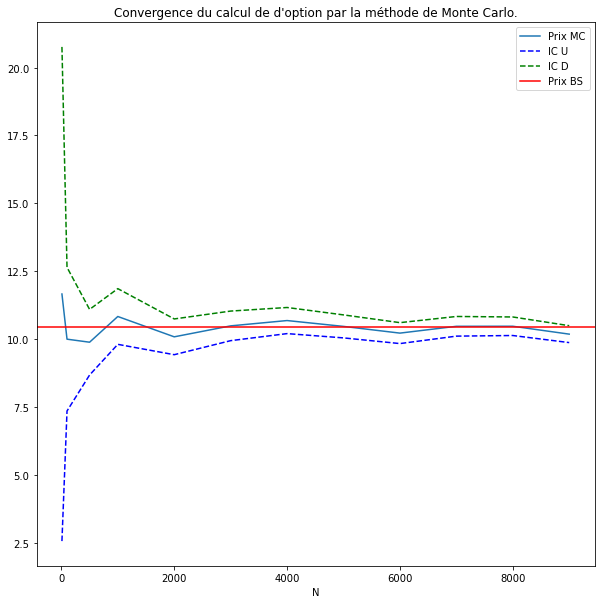

In [32]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.plot(num_simulations[:12], calls_prices[:12], label=r'Prix MC')
plt.plot(num_simulations[:12], IC_up[:12], 'b--',label=r'IC U')
plt.plot(num_simulations[:12], IC_down[:12], 'g--',label=r'IC D')
plt.axhline(call_option_price, c='r',label=r'Prix BS')
ax.set(title=r"Convergence du calcul de d'option par la méthode de Monte Carlo.",
      xlabel='N')
plt.legend();

## Techniques de réduction de variance

### Méthode des variables antithétiques

In [41]:
num_simulations = 100000 # Nombre de simulations pour MC

In [42]:
def european_call_option_price_antithetic(S0, K, r, sigma, T, num_simulations):
    """
    Calcul du prix d'un call Européen par la simuualtion de Monte Carlo en utilisant la technique des variables antithétiques
    """
    np.random.seed(42)  
    dt = T / 252
    num_steps = int(T / dt)

    # On génère des variables aléatoires de signe opposé
    Z_1 = np.random.normal(0, 1, (num_simulations, num_steps))
    Z_2 = -Z_1

    S_1T = S0*np.exp((r-sigma**2/2)*T + sigma*np.sqrt(T)*Z_1)
    S_2T = S0*np.exp((r-sigma**2/2)*T + sigma*np.sqrt(T)*Z_2)
    
    payoff_1 = np.maximum(S_1T - K, 0)
    payoff_2 = np.maximum(S_2T - K, 0)
    # On calcule la moyenne du payoff
    avg_payoff = 0.5 * (payoff_1 + payoff_2)

    option_price = np.mean(avg_payoff) * np.exp(-r * T)
    error = np.std(avg_payoff) / np.sqrt(num_simulations)

    lower_bound = option_price - 1.96 * error
    upper_bound = option_price + 1.96 * error
    return option_price, error, (lower_bound, upper_bound)

In [43]:
option_price = european_call_option_price_antithetic(S0, K, r, sigma, T, num_simulations)
print("Prix du call (Monte Carlo VA):", option_price)

Prix du call (Monte Carlo VA): (10.452648183250512, 0.02444540230491231, (10.404735194732883, 10.50056117176814))


### Avec la méthode de contrôle de variable

In [44]:
def european_call_option_price_cv(S0, K, r, sigma, T, num_simulations):
    """
    Calcul du prix d'un call Européen par la simuualtion de Monte Carlo en utilisant la technique des variables antithétiques
    """
    np.random.seed(42)  
    dt = T / 252
    num_steps = int(T / dt)

    Z = np.random.normal(0, 1, (num_simulations, num_steps))

    S_T = S0*np.exp((r-sigma**2/2)*T + sigma*np.sqrt(T)*Z)
    
    # On utilise la parité call-put pour changer de variable de contrôle
    payoff = S0 - K * np.exp(-r*T) + np.exp(-r*T)*np.maximum(K - S_T, 0)

    # Calculate the Monte Carlo estimate and the error
    option_price = np.mean(payoff)
    error = np.std(payoff) / np.sqrt(num_simulations)

    # Calculate the confidence intervals (95% confidence level)
    # z_critical = norm.ppf(0.975)  # Z-score for 95% confidence level (two-tailed)
    lower_bound = option_price - 1.96 * error
    upper_bound = option_price + 1.96 * error
    return option_price, error, (lower_bound, upper_bound)

In [45]:
option_price = european_call_option_price_cv(S0, K, r, sigma, T, num_simulations)
print("Prix du call (Monte Carlo VC):", option_price)

Prix du call (Monte Carlo VC): (10.452461302592145, 0.02738430288602731, (10.39878806893553, 10.506134536248759))


## Avec échantillonnage préférentiel

On peut montrer par le théorème de Girsanov que :
$$
E\left(g(W_T)\right) 
 = E\left(e^{-\lambda W_T -\frac{\lambda^2 T}{2}}g(W_T+\lambda T)\right).
$$

In [52]:
def european_call_option_price_importance_sampling_2(S0, K, r, sigma, T, num_simulations,lbd):
    """
    Calcul du prix d'un call Européen par la simulation de Monte Carlo en utilisant la technique d'échantillonnage préférentiel
    """
    np.random.seed(42) 
    dt = T / 252
    num_steps = int(T / dt)

    Z = np.random.normal(0, 1, (num_simulations, num_steps))

    S_T = S0 * np.exp((r-sigma**2/2)*T + sigma*(np.sqrt(T)*Z + lbd*T))
    payoff = np.exp(-r*T)*np.maximum(S_T - K, 0)
    # On peut s'appuyer du théorème de Girsanov appliqué au call européeen
    importance = np.exp(-lbd * np.sqrt(T)*Z - lbd ** 2 * T / 2)
    payoff = importance * payoff

    # Calculate the Monte Carlo estimate and the error
    option_price = np.mean(payoff)
    error = np.std(payoff) / np.sqrt(num_simulations)
    
    # Calculate the confidence intervals (95% confidence level)
    # z_critical = stats.norm.ppf(0.975)  # Z-score for 95% confidence level (two-tailed)
    lower_bound = option_price - 1.96 * error
    upper_bound = option_price + 1.96 * error
    return option_price, error, (lower_bound, upper_bound)

In [57]:
K2 = 200

In [58]:
call_option_price, error, confidence_intervals = european_call_monte_carlo(S0, K2, r, sigma, T, num_simulations)
print("Prix du Call Euro (Monte Carlo):", call_option_price)
print("Erreur:", error)
print("Intervalles de confiance (95%):", confidence_intervals)

Prix du Call Euro (Monte Carlo): 0.002764835528556658
Erreur: 0.0007688340610623266
Intervalles de confiance (95%): (0.0012579207688744978, 0.004271750288238818)


In [60]:
lbd_opt = (np.log(K2/S0)-(r-sigma**2/2)*T)/(sigma*T)
option_price = european_call_option_price_importance_sampling_2(S0, K2, r, sigma, T, num_simulations,lbd=lbd_opt)
print("Prix du call (Monte Carlo EP):", option_price)

Prix du call (Monte Carlo EP): (0.004798789185895846, 2.0240300228958657e-05, (0.004759118197447087, 0.004838460174344605))


In [61]:
call_option_price = black_scholes_call(S0, K2, r, sigma, T)
print("Prix d'un Call Européen (Black-Scholes):", call_option_price)

Prix d'un Call Européen (Black-Scholes): 0.0047988351066194646
